 # Monte Carlo




 W tym eksperymencie wykorzystam metodę Monte Carlo do oszacowania wartości liczby π, symulując losowanie punktów w obrębie ćwiartki koła o promieniu 1, umieszczonej w pierwszej ćwiartce układu współrzędnych. W każdej iteracji będę generował losowe współrzędne dla x i y w zakresie od 0 do 1. Następnie sprawdzę, czy dany punkt leży wewnątrz ćwiartki koła, obliczając jego odległość od środka układu.( Pitagoras - x^2 + y^2 = r^2) Jeśli odległość będzie mniejsza lub równa 1 to znaczy że punkt leży wewnątrz ćwiartki. Na podstawie stosunku liczby takich punktów do wszystkich wylosowanych oszacuję pole ćwiartki koła, a stąd przybliżoną wartość π.

In [76]:
import numpy as np
import random
import matplotlib.pyplot as plt



# Funkcja do szacowania  pi za pomocą algorytmu Monte Carlo

In [ ]:


def MonteCarlo(N):
    # tworzymy listy w których będą zapisywane wartosci do pozniejszej wizualizacji 
    x_in =[]
    x_out = []
    y_in = []
    y_out =[]
    
    res = 0
    for i in range(1, N + 1):
        x = random.uniform(0,1)
        y = random.uniform(0,1)
        odl = np.sqrt(x**2 + y**2)
        if odl <=1:
            res +=1
            x_in.append(x)
            y_in.append(y)
        else:
            x_out.append(x)
            y_out.append(y)
    pole = res/ N
    pi = pole * 4
    print(f"Przybliżona wartość pi wynosi: {pi}")
    return pi, x_in, y_in, x_out, y_out



    

# Testowanie działania funkcji i wizualizacja dla różnej liczby losowań

Przybliżona wartość pi wynosi: 3.2
Przybliżona wartość pi wynosi: 2.76
Przybliżona wartość pi wynosi: 3.156
Przybliżona wartość pi wynosi: 3.1276
Przybliżona wartość pi wynosi: 3.14512
Przybliżona wartość pi wynosi: 3.143104


C:\Users\tdroz\AppData\Local\Temp\ipykernel_6228\2490729501.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\tdroz\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


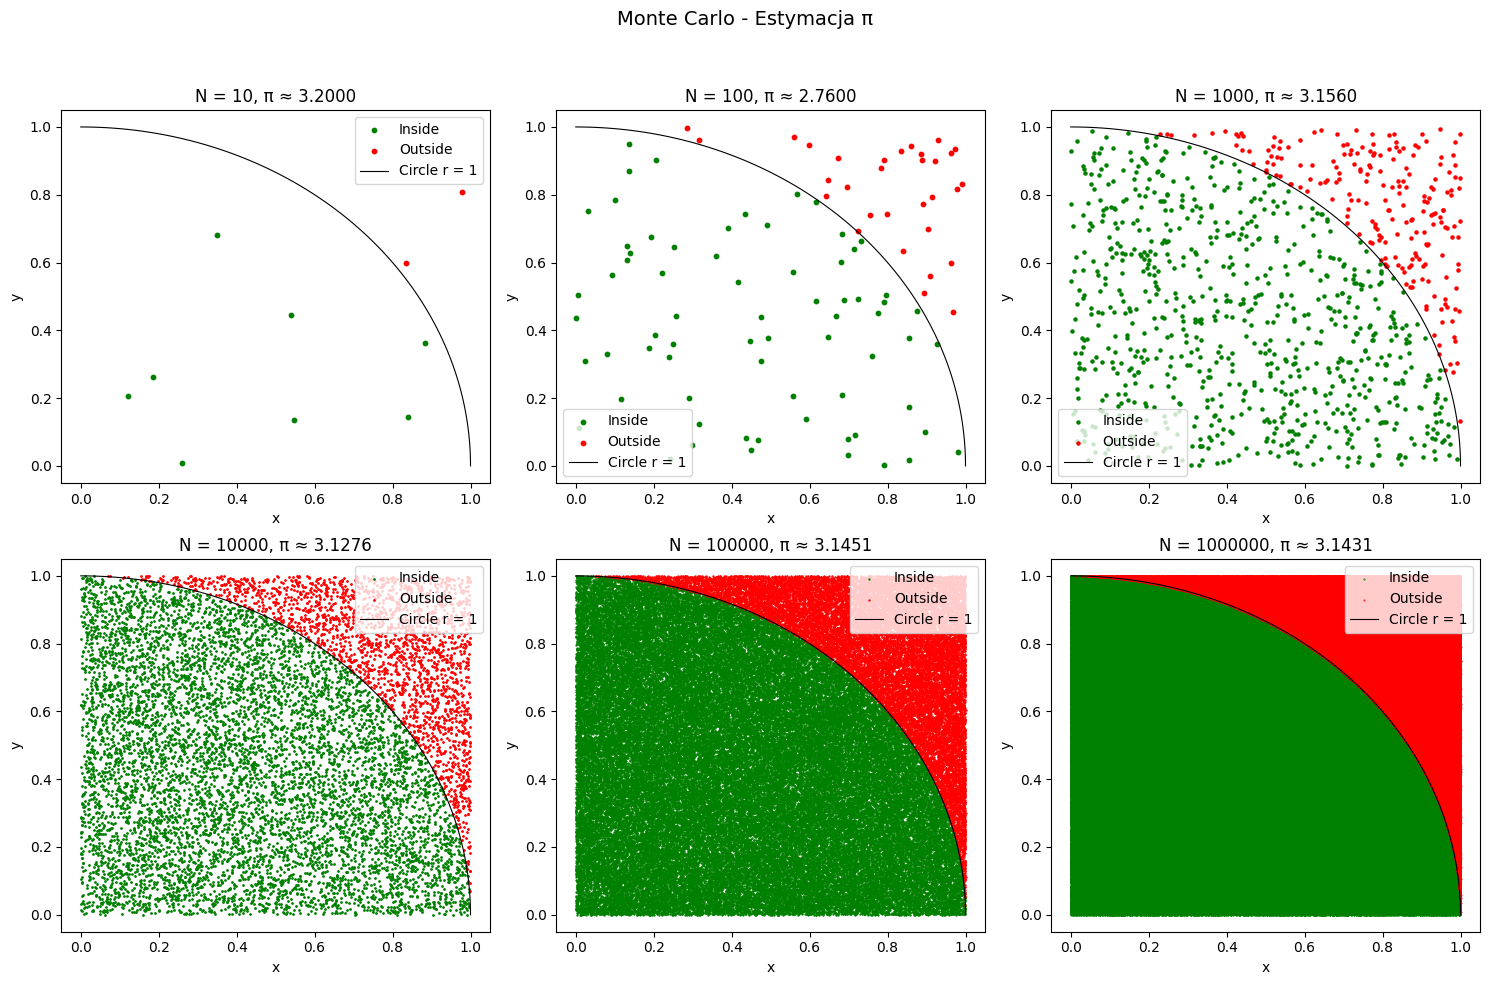

In [78]:
N_values = [10, 100, 1000, 10000, 100000, 1000000]


results = [MonteCarlo(N) for N in N_values]


x = np.linspace(0, np.pi/2, 100)
circle_x = np.cos(x)
circle_y = np.sin(x)


fig, axes = plt.subplots(2, 3, figsize=(15, 10), facecolor="white")
fig.suptitle("Monte Carlo - Estymacja π", fontsize=14)


colors = {'inside': 'green', 'outside': 'red'}
sizes = [10, 10, 5, 1, 0.5, 0.2]


for i, ax in enumerate(axes.flat):
    ax.scatter(results[i][1], results[i][2], color=colors['inside'], s=sizes[i], label='Inside')
    ax.scatter(results[i][3], results[i][4], color=colors['outside'], s=sizes[i], label='Outside')
    ax.plot(circle_x, circle_y, color='black', linewidth=0.8, label='Circle r = 1')
    ax.set_title(f"N = {N_values[i]}, π ≈ {results[i][0]:.4f}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()


plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# Wykres zmienności wartości estymowanej pi  w zależności od liczby losowań w porównaniu do prawdziwej wartości liczby pi

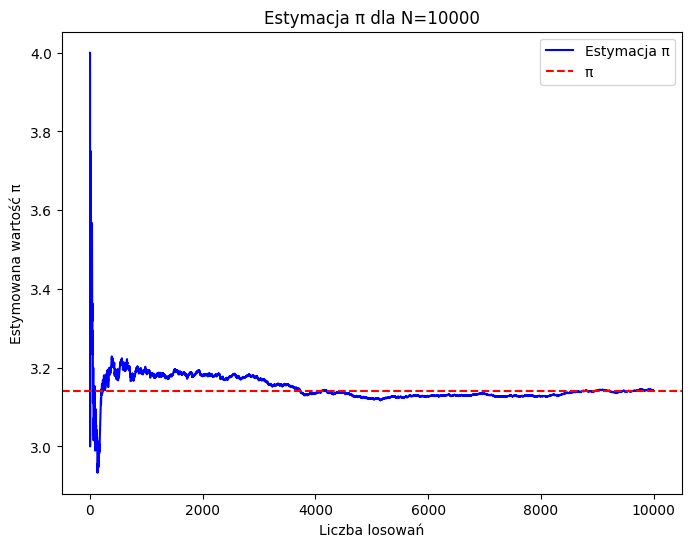

In [83]:

def MonteCarlo_estimation(N):
    estimations = []
    res = 0
    for i in range(1, N + 1):
        x = random.uniform(0, 1)
        y = random.uniform(0, 1)
        odl = np.sqrt(x**2 + y**2)
        if odl <= 1:
            res += 1
        pi_estimate = (res / i) * 4
        estimations.append(pi_estimate)
    return estimations




N = 10000
estimations = MonteCarlo_estimation(N)


plt.figure(figsize=(8, 6))
plt.plot(range(1, N + 1), estimations, color='blue', label='Estymacja π')
plt.axhline(y=np.pi, color='red', linestyle='--', label='π')
plt.title(f"Estymacja π dla N={N}")
plt.xlabel('Liczba losowań')
plt.ylabel('Estymowana wartość π')
plt.legend()
plt.show()


# Ścieżki dążenia estymowanej wartości π w 10 próbach

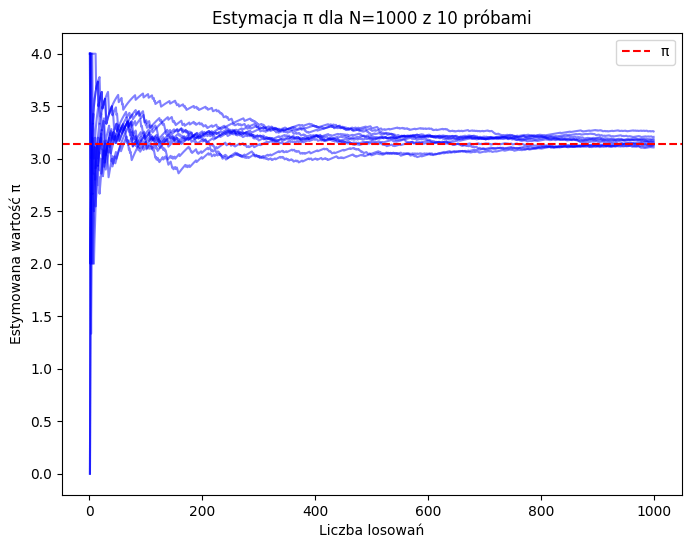

In [82]:

N = 1000
num_trials = 10
all_estimations = [MonteCarlo_estimation(N) for _ in range(num_trials)]


plt.figure(figsize=(8, 6))
for trial_estimations in all_estimations:
    plt.plot(range(1, N + 1), trial_estimations, color='blue', alpha=0.5)
plt.axhline(y=np.pi, color='red', linestyle='--', label='π')
plt.title(f"Estymacja π dla N={N} z 10 próbami")
plt.xlabel('Liczba losowań')
plt.ylabel('Estymowana wartość π')
plt.legend()
plt.show()


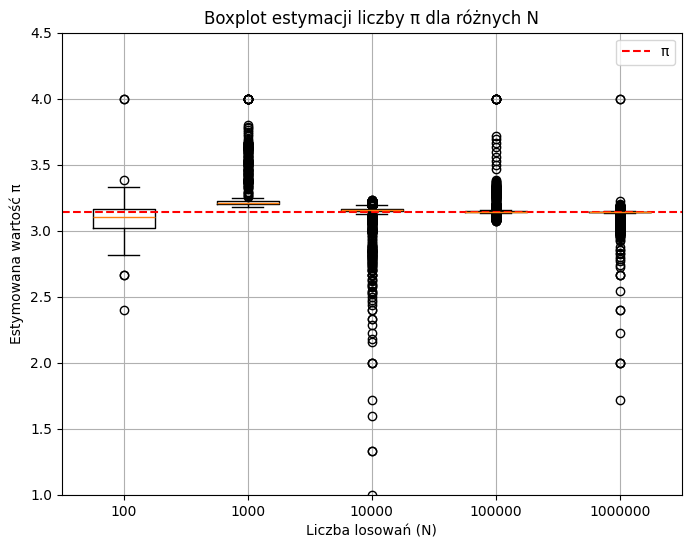

In [90]:


N_values = [100, 1000, 10000, 100000, 1000000]
results = {N: MonteCarlo_estimation(N) for N in N_values}

plt.figure(figsize=(8, 6))
plt.boxplot(results.values(), labels=[str(N) for N in N_values])
plt.axhline(y=np.pi, color='r', linestyle='--', label='π')
plt.xlabel("Liczba losowań (N)")
plt.ylabel("Estymowana wartość π")
plt.title("Boxplot estymacji liczby π dla różnych N")
plt.ylim(1, 4.5)
plt.legend()
plt.grid(True)
plt.show()





# Wnioski z algorytmu Monte Carlo


W miarę wzrostu liczby losowań, średnia estymowana wartość π zbliża się do rzeczywistej wartości.

Każde uruchomienie daje nieco inne rezultaty (losowość), jednak ogólny trend pokazuje stopniowe dążenie do π

Im większa liczba danych, tym więcej obliczeń, co daje dokładny wynik ale wolne działanie programu

Monte Carlo dobrze sprawdza się w sytuacjach, gdzie trudno użyć klasycznych wzorów analitycznych.
